<a href="https://colab.research.google.com/github/WoradeeKongthong/ComputerVision/blob/master/CNN_fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1D Convolutional Layer
input dimension : [sample, length of sample, channel]

In [55]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, Dense
import matplotlib.pyplot as plt

In [56]:
# define input data
data = np.asarray([0, 0, 0, 1, 1, 0, 0, 0])
print(data.shape)

# reshape to be Conv layer input
data = data.reshape(1, len(data), 1)
print(data.shape)
print(data)

(8,)
(1, 8, 1)
[[[0]
  [0]
  [0]
  [1]
  [1]
  [0]
  [0]
  [0]]]


In [57]:
# create simple model
model = Sequential()
model.add(Conv1D(filters=1, kernel_size=3, input_shape=(data.shape[1], data.shape[2])))
print('input shape : ',model.input_shape)
model.summary()

input shape :  (None, 8, 1)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 1)              4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [58]:
# check weight shape 
print("weight shape", model.get_weights()[0].shape)
print("bias shape", model.get_weights()[1].shape)
print()
print(model.get_weights())

weight shape (3, 1, 1)
bias shape (1,)

[array([[[ 0.10971427]],

       [[-0.63399243]],

       [[ 0.38508558]]], dtype=float32), array([0.], dtype=float32)]


In [59]:
# define a vertical line detector (list of weights array and bias array)
detector = [np.asarray([[[0]],[[1]],[[0]]]), np.asarray([0.0])]
print(len(detector))
print(detector)

2
[array([[[0]],

       [[1]],

       [[0]]]), array([0.])]


In [60]:
# store the detector as weights of the model
model.set_weights(detector)
print(model.get_weights())

[array([[[0.]],

       [[1.]],

       [[0.]]], dtype=float32), array([0.], dtype=float32)]


In [61]:
# apply detector(or filter) to input data
ypred = model.predict(data)
print(ypred)
print(ypred.shape)

[[[0.]
  [0.]
  [1.]
  [1.]
  [0.]
  [0.]]]
(1, 6, 1)


# 2D Convolutional Layer
input dimension : [samples, columns, rows, channels]

In [64]:
from keras.layers import Conv2D

In [65]:
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = np.asarray(data)
print(data.shape)

# reshape to be Conv2D input (sample, y, x, channel)
data = data.reshape(1, data.shape[0], data.shape[1], 1)
print(data.shape)

(8, 8)
(1, 8, 8, 1)


In [66]:
# create model
model = Sequential()
model.add(Conv2D(filters=1, kernel_size=(3,3), input_shape=(8,8,1)))
print('input shape : ',model.input_shape)
print(model.summary())

input shape :  (None, 8, 8, 1)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
# model initial weights and bias
print('weights shape : ',np.asarray(model.get_weights()[0]).shape)
print(np.asarray(model.get_weights()[0]))

print('\nbias shape : ',np.asarray(model.get_weights()[1]).shape)
print(np.asarray(model.get_weights()[1]))


weights shape :  (3, 3, 1, 1)
[[[[ 0.2421692 ]]

  [[-0.19744855]]

  [[-0.0276081 ]]]


 [[[ 0.27441698]]

  [[ 0.1685344 ]]

  [[ 0.48070657]]]


 [[[ 0.00308228]]

  [[-0.4776503 ]]

  [[-0.38169363]]]]

bias shape :  (1,)
[0.]


In [70]:
# define a vertical line detector (shape : (3,3,1,1))
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
print(np.asarray(detector).shape)

# combine with bias
detector = [np.asarray(detector), np.asarray([0.0])]

(3, 3, 1, 1)


In [71]:
# store detector as weights of the model
model.set_weights(detector)
model.get_weights()

[array([[[[0.]],
 
         [[1.]],
 
         [[0.]]],
 
 
        [[[0.]],
 
         [[1.]],
 
         [[0.]]],
 
 
        [[[0.]],
 
         [[1.]],
 
         [[0.]]]], dtype=float32),
 array([0.], dtype=float32)]

In [72]:
# apply detector (or filter) to input data
ypred = model.predict(data)
print('ypred shape : ',ypred.shape)
print(ypred)

ypred shape :  (1, 6, 6, 1)
[[[[0.]
   [0.]
   [3.]
   [3.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [3.]
   [3.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [3.]
   [3.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [3.]
   [3.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [3.]
   [3.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [3.]
   [3.]
   [0.]
   [0.]]]]


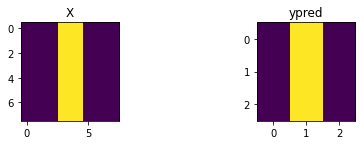

In [97]:
plt.subplot(1,3,1)
plt.imshow(data[0])
plt.title('X')

plt.subplot(1,3,3)
plt.imshow(ypred[0])
plt.title('ypred')

plt.show()

# Convolutional Layer Output Dimension
input dim : [samples, rows, columns, channels]  
output dim : [samples, rows, columns, filters]  
*   output rows and columns get smaller because of kernel_size (Border Effect) 
*   output channels get larger because of filter number

In [83]:
print(data.shape)

(1, 8, 8, 1)


In [84]:
# create model
model = Sequential()
model.add(Conv2D(filters=2, kernel_size=(3,3), input_shape=(8,8,1)))
print('input shape : ', model.input_shape)
model.summary()

input shape :  (None, 8, 8, 1)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 2)           20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


## Fix Border Effect Problem with Padding

In [85]:
# create model
model = Sequential()
model.add(Conv2D(filters=2, kernel_size=(3,3), input_shape=(8,8,1), padding='same'))
print('input shape : ', model.input_shape)
model.summary()

input shape :  (None, 8, 8, 1)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 8, 8, 2)           20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


## Down sampling with Stride

In [86]:
# create model
model = Sequential()
model.add(Conv2D(filters=2, kernel_size=(3,3), strides=(2,2), input_shape=(8,8,1), padding='same'))
print('input shape : ', model.input_shape)
model.summary()

input shape :  (None, 8, 8, 1)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 4, 4, 2)           20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


## Down Sampling with Pooling Layer
More robust and common approach to summarize the features detected in the input.  
(the model's invariance to local translation)  
 
2 types of pooling layer 
1.   Average Pooling
2.   Maximum Pooling

### Simple model : detecting vertical line

In [87]:
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = np.asarray(data)

# reshape to be Conv2D input
data = data.reshape(1, data.shape[0], data.shape[1], 1)
print(data.shape)

(1, 8, 8, 1)


In [88]:
# create model
model = Sequential()
model.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu',input_shape=(8,8,1)))
print('input shape : ',model.input_shape)
print(model.summary())

input shape :  (None, 8, 8, 1)
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


In [89]:
# define a vertical line detector (shape : (3,3,1,1))
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]

# combine with bias
detector = [np.asarray(detector), np.asarray([0.0])]

# set model weights
model.set_weights(detector)

In [90]:
ypred = model.predict(data)

# enumerate rows
for r in range(ypred.shape[1]):
  print([ypred[0,r,c,0] for c in range(ypred.shape[2])])

[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


### Average Pooling Layer added

In [91]:
from keras.layers import AveragePooling2D

# create model
model = Sequential()
model.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu',input_shape=(8,8,1)))
model.add(AveragePooling2D())
print('input shape : ',model.input_shape)
print(model.summary())

input shape :  (None, 8, 8, 1)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 6, 6, 1)           10        
_________________________________________________________________
average_pooling2d (AveragePo (None, 3, 3, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


Note : the output size is halved

In [92]:
# set the same model weights
model.set_weights(detector)

# apply filter to input data
ypred = model.predict(data)

# enumerate rows
for r in range(ypred.shape[1]):
  print([ypred[0,r,c,0] for c in range(ypred.shape[2])])

[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


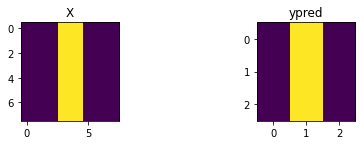

In [96]:
plt.subplot(1,3,1)
plt.imshow(data[0])
plt.title('X')

plt.subplot(1,3,3)
plt.imshow(ypred[0])
plt.title('ypred')

plt.show()

### Max Pooling Layer

In [98]:
from keras.layers import MaxPooling2D

# create model
model = Sequential()
model.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu',input_shape=(8,8,1)))
model.add(MaxPooling2D())
print('input shape : ',model.input_shape)
print(model.summary())

input shape :  (None, 8, 8, 1)
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 6, 6, 1)           10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
# set the same model weights
model.set_weights(detector)

# apply filter to input data
ypred = model.predict(data)

# enumerate rows
for r in range(ypred.shape[1]):
  print([ypred[0,r,c,0] for c in range(ypred.shape[2])])

[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


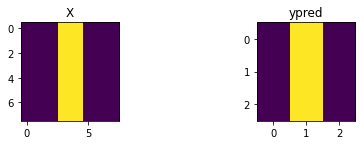

In [101]:
plt.subplot(1,3,1)
plt.imshow(data[0])
plt.title('X')

plt.subplot(1,3,3)
plt.imshow(ypred[0])
plt.title('ypred')

plt.show()

# Global Pooling Layers
*   downsampling the entire feature map to a single value
*   aggressively summarize the presence of a feature in an image

## Global Average Pooling Layer

In [102]:
from keras.layers import GlobalAveragePooling2D

# create model
model = Sequential()
model.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu',input_shape=(8,8,1)))
model.add(GlobalAveragePooling2D())
print('input shape : ',model.input_shape)
print(model.summary())

input shape :  (None, 8, 8, 1)
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 6, 6, 1)           10        
_________________________________________________________________
global_average_pooling2d (Gl (None, 1)                 0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


In [103]:
# set the same model weights
model.set_weights(detector)

# apply filter to input data
ypred = model.predict(data)

print(ypred)

[[1.]]


## Global Max Pooling Layer

In [106]:
from keras.layers import GlobalMaxPooling2D

# create model
model = Sequential()
model.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu',input_shape=(8,8,1)))
model.add(GlobalMaxPooling2D())
print('input shape : ',model.input_shape)
print(model.summary())

input shape :  (None, 8, 8, 1)
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 6, 6, 1)           10        
_________________________________________________________________
global_max_pooling2d (Global (None, 1)                 0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
# set the same model weights
model.set_weights(detector)

# apply filter to input data
ypred = model.predict(data)

print(ypred)

[[3.]]


# Manage Model Complexity with 1x1 Convolutional Layer
usage
*   create projection layer (channel-wise pooling)
*   dimensionality reduction 
*   downsample the depth or number of feature maps

In [113]:
# create starter model
model = Sequential()
model.add(Conv2D(512, (3,3), padding='same', activation='relu', input_shape=(256,256,3)))
print('input shape : ', model.input_shape)
model.summary()

input shape :  (None, 256, 256, 3)
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 512)     14336     
Total params: 14,336
Trainable params: 14,336
Non-trainable params: 0
_________________________________________________________________


## Projecting Feature Maps / Channel-wise pooling

In [114]:
model = Sequential()
model.add(Conv2D(512, (3,3), padding='same', activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(512, (1,1), activation='relu'))
print('input shape : ', model.input_shape)
model.summary()

input shape :  (None, 256, 256, 3)
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 512)     14336     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 256, 256, 512)     262656    
Total params: 276,992
Trainable params: 276,992
Non-trainable params: 0
_________________________________________________________________


## Decreasing Feature Maps

In [115]:
model = Sequential()
model.add(Conv2D(512, (3,3), padding='same', activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(64, (1,1), activation='relu'))
print('input shape : ', model.input_shape)
model.summary()

input shape :  (None, 256, 256, 3)
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 256, 256, 512)     14336     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 256, 256, 64)      32832     
Total params: 47,168
Trainable params: 47,168
Non-trainable params: 0
_________________________________________________________________


## Increasing Feature Maps

In [116]:
model = Sequential()
model.add(Conv2D(512, (3,3), padding='same', activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(1024, (1,1), activation='relu'))
print('input shape : ', model.input_shape)
model.summary()

input shape :  (None, 256, 256, 3)
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 256, 256, 512)     14336     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 256, 256, 1024)    525312    
Total params: 539,648
Trainable params: 539,648
Non-trainable params: 0
_________________________________________________________________


Note : 1x1 Filters are used in Inception model, Residual network